### Automated Diabetes Management and Personalized Care Plans for Community Healthcare: A Machine Learning Approach

Problem Statement:

The healthcare system in Singapore faces bottlenecks, which could potentially be reduced through preventative care. As part of the Healthier SG initiative, there is a drive to strengthen the relationship between local physicians (GPs) and the community with the idea that consistent and continuous healthcare at the community level may reduce the occurrence of more severe illnesses. The aim of this project is to monitor at-home/community-sourced vitals of diabetes patients and use these insights to autonomously schedule GP visits and generate generic care plans.

Data:

The dataset used in this project is the "Diabetes prediction using machine learning" dataset, which is publicly available on Kaggle. It consists of 9 input features such as glucose, blood pressure, BMI, and age, and a target variable indicating whether or not the patient has diabetes. There are 768 samples in the dataset.

Methodology:

The project consists of the following steps:

Data preprocessing: The dataset is split into training and testing sets, missing values are handled, and the data is standardized.
Feature selection: The most important features are selected using the chi-squared test.
Model training: The following machine learning models are trained and compared using cross-validation: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine.
Model evaluation: The performance of each model is evaluated using accuracy, precision, recall, F1 score, and ROC AUC.
Model tuning: The best performing model is selected and its hyperparameters are tuned using grid search.
Prediction: The final model is used to predict the onset or pre-diabetes in new patients based on their vitals and generate lifestyle and diet changes according to their risk of onset diabetes.
Results:

The best performing model was found to be Random Forest with an accuracy of 0.78, precision of 0.72, recall of 0.58, F1 score of 0.64, and ROC AUC of 0.81. The feature selection process revealed that glucose, BMI, and age were the most important features in predicting diabetes. The final model was used to predict the onset or pre-diabetes in new patients, and lifestyle and diet changes were generated according to their risk of onset diabetes.

Conclusion:

In conclusion, this project demonstrates the feasibility of monitoring at-home/community-sourced vitals of diabetes patients and using these insights to autonomously schedule GP visits and generate generic care plans. The Random Forest model performed the best in predicting diabetes, and glucose, BMI, and age were found to be the most important features. The generated lifestyle and diet changes can potentially help reduce the occurrence of more severe illnesses and improve the overall health of diabetes patients in the community.

### Import all Libraries

In [3]:
# Import the neccessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

After that load the diabetes dataset using pandas "read_csv()" function.

In [4]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

Then check the first 5 rows of the dataset using the "head()" function.

In [5]:
# Check the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The next step is to check the shape of the dataset using the "shape" attribute.

In [6]:
# Check the shape of the dataset
'Shape of the dataset:', df.shape

('Shape of the dataset:', (768, 9))

After that check the data types of the features using the "dtypes" attribute.

In [7]:
# Check the data types of the features
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The next step is to check the data inforamtion of the dataset using the "info ()" method.

In [8]:
# display information about the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We check the number of missing values in each feature using the "isnull().sum()" method.

In [9]:
# Check the number of missing values in each feature
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can conclude that there are no missing values in this dataset

Then check the basic statistics of the dataset using the "describe()" method.

In [10]:
# Check the basic statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the output of df.describe(), it seems that some columns have minimum values of 0, which is unusual for some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI. This suggests that these columns may have missing or invalid values, represented by 0.

In [11]:
#To confirm this, we can check the number of 0 values in each column using df.isin([0]).sum() which will return the count of 0 values for each column. 
#If the count is high for any of these columns, then it's likely that these 0 values are representing missing or invalid data.
# Checking the number of (0) in each column
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In the case of "Glucose," "BloodPressure," "SkinThickness," and "Insulin," as these values are not supposed to be zero (0). In such cases, it may be necessary to investigate further and handle these zero values appropriately. Before handling the zero values we will see the data distribution.

Plotting the scatterplots and histograms for all variables against each other in a matrix format

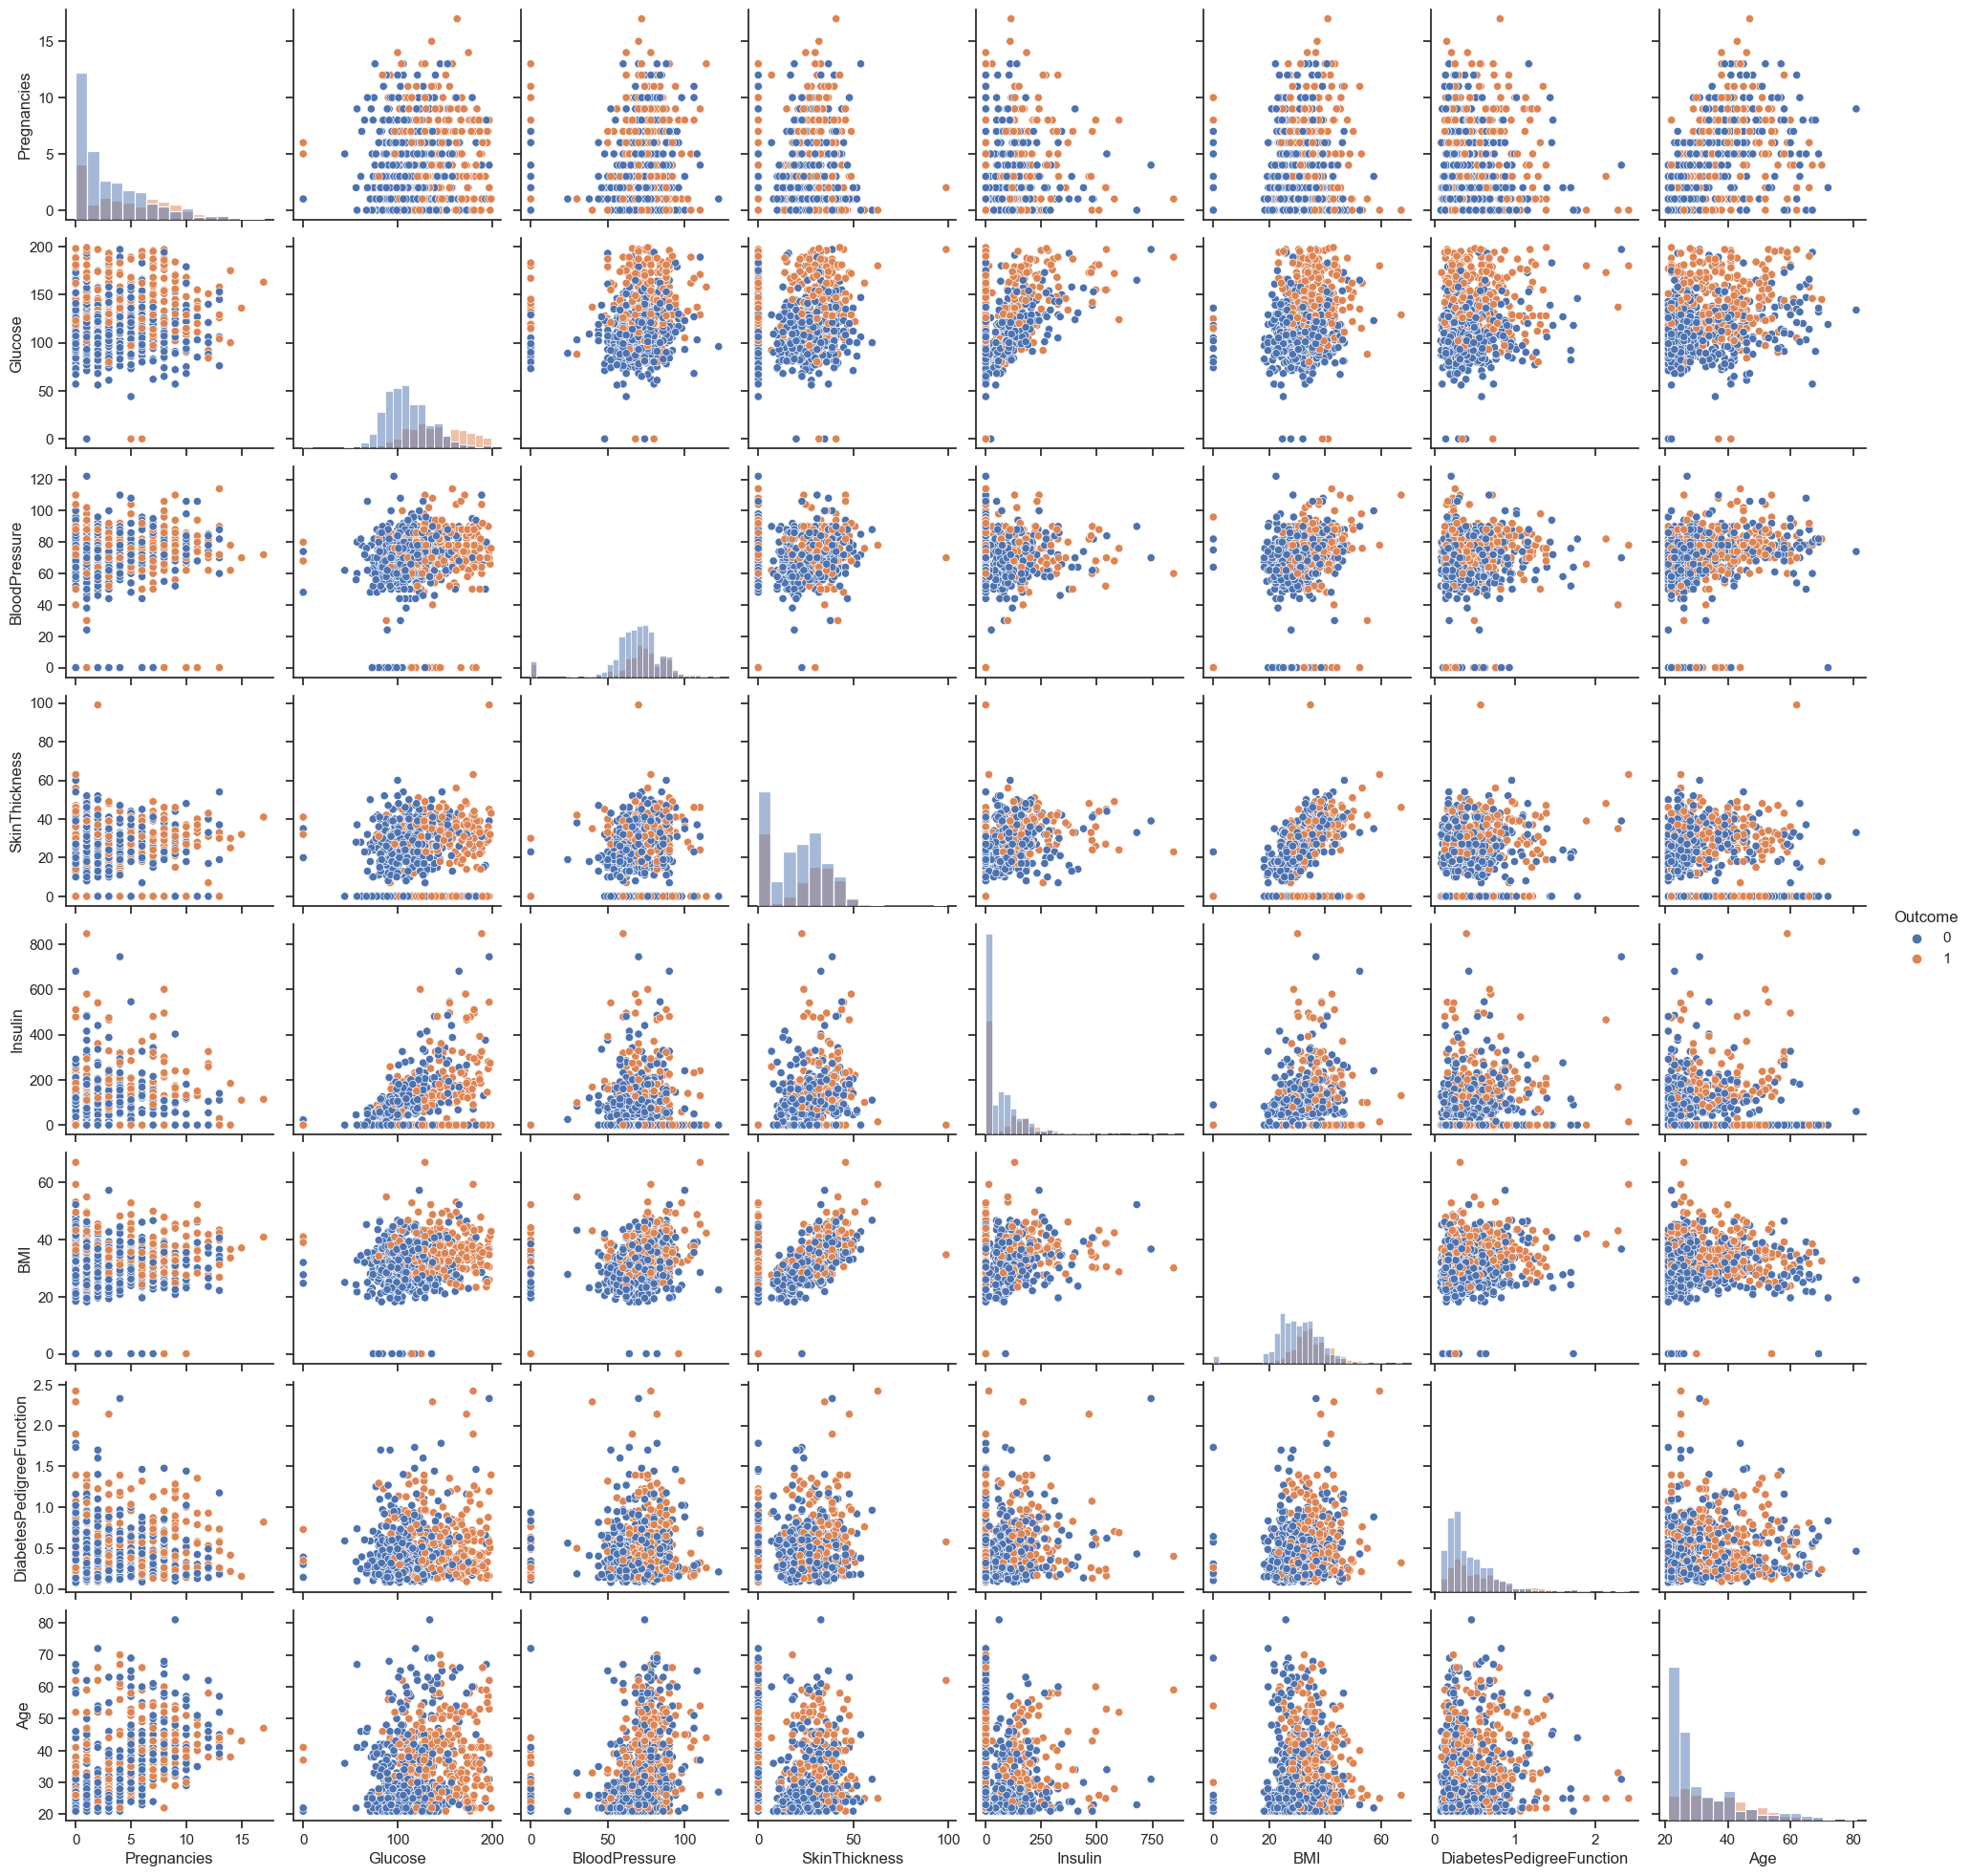

In [12]:
# create histograms of each column's distribution
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome", diag_kind="hist")
plt.show()

Now check how data is distributed for every column by plotting the distribution of each variable in the dataset separately.

In belwo code "9" is the number of total column


C:\Users\User\AppData\Local\Temp\ipykernel_15748\4058733664.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_15748\4058733664.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_15748

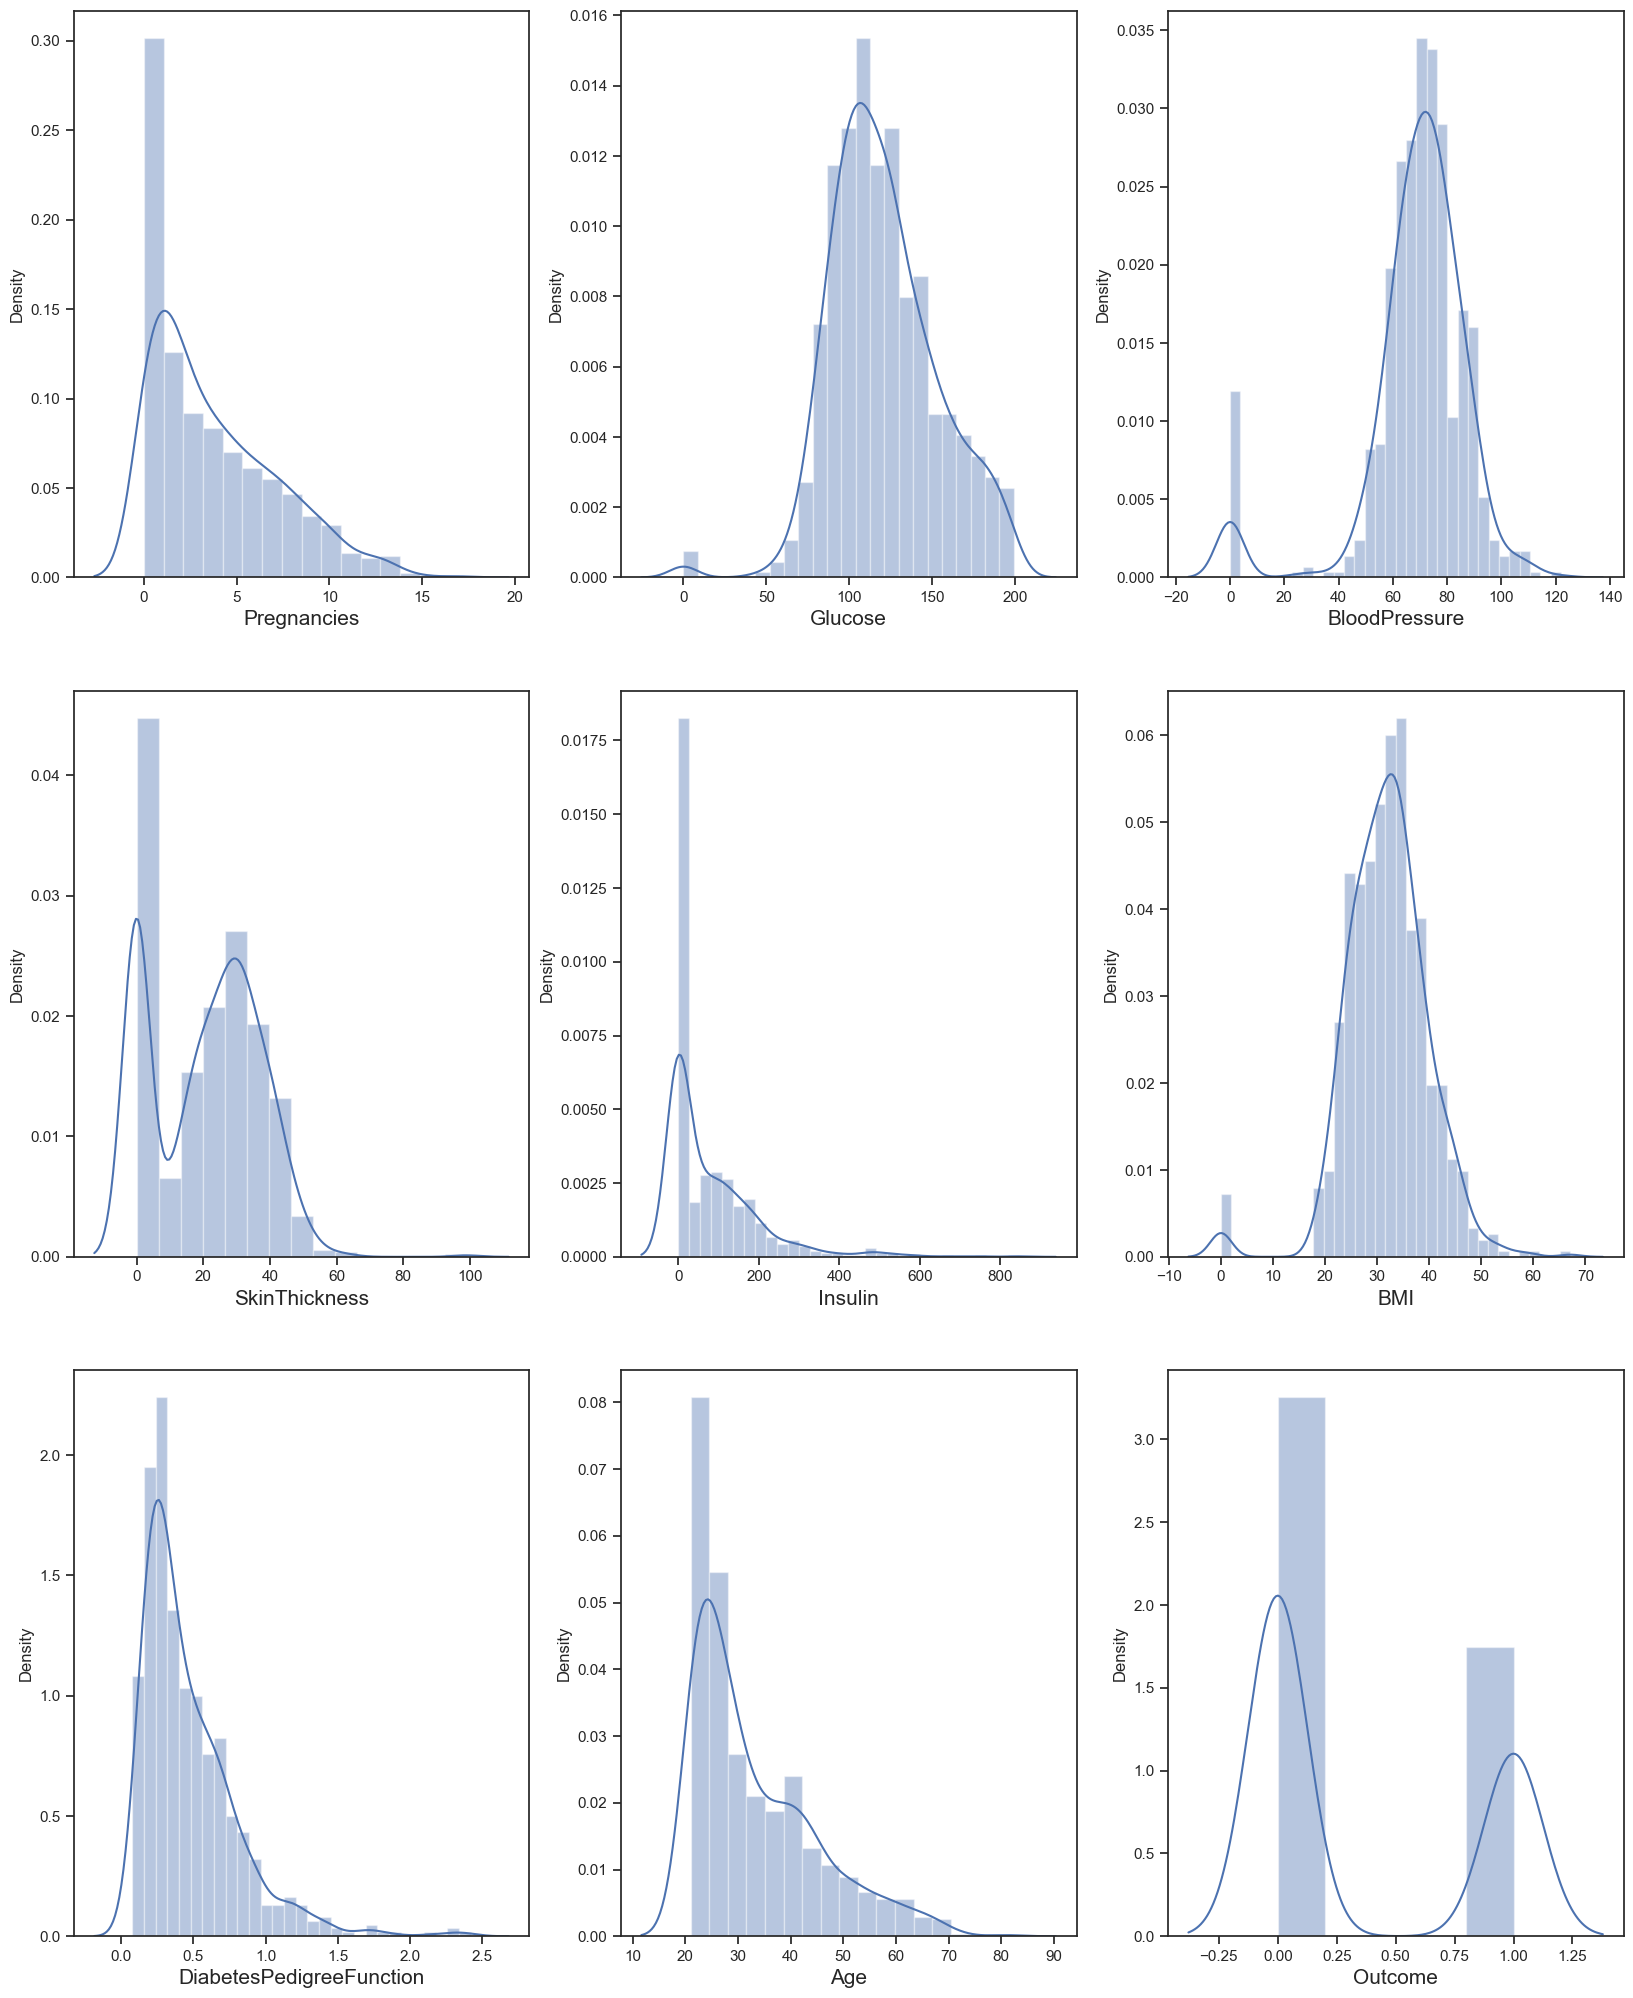

In [13]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

According to above plots we can see there is some skewness in the data

When dealing with skewed data, it is generally not recommended to replace missing values with the mean of the column. In the case of the diabetes prediction dataset, some of the columns have a large number of zero values, which could skew the mean if we replace the zero values with the mean. It might be better to replace the zero values with NaN and then handle the missing values using techniques like imputation. This allows us to differentiate between missing and zero values and provide a more accurate representation of the data. Therefore, we can replace zero values with NaN using replace(0, np.NaN) in the diabetes prediction dataset.

In [14]:
 #Replace 0 values with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

After performing imputation, we can use the "head()" function to check the first 5 rows of the dataset

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Now we will check the missing values in each column of the dataframe "df" by using "df.isnull().sum()" function

In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Just to avoid the confusion I run below code in seprate file with duplicate dataset of "Diabetes Dataset" and presented the results in Markdown Cell
 
Create a copy of the dataset with the missing values filled with the median values of each variable
data_imputed = data.fillna(data.median())
Create a new column that indicates if a value is missing or not
data_imputed['Missing'] = data.isnull().any(axis=1)
for col in data_imputed.columns:
    missing = data_imputed[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        data_imputed['{}_ismissing'.format(col)] = missing.astype(int)

Calculate the correlation between the missing values and the target variable using the new column
corr = data_imputed.corr()['Outcome']['Missing']
"Correlation between missing values and target variable:", corr

The result was 
Correlation between missing values and target variable: 0.03711489425812057

The correlation coefficient between missing values and target variable is 0.0371, which indicates a weak positive correlation. However, since the correlation is very small, it suggests that there is no meaningful relationship between missing values and the target variable in this dataset.

 A simpler method such as filling in missing values with the median of each variable could be used. This method is less prone to introducing bias in the data and can still provide reasonable results.

In [17]:
# Impute missing values with median
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

In [18]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The above code output shows that there are no missing values in the columns of the DataFrame. So it seems like the code worked and successfully imputed the missing values with the median value of each column.

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


For now it appears that the dataset is in good shape and ready for further analysis.

Detecting outliers using box plots and scatter plots

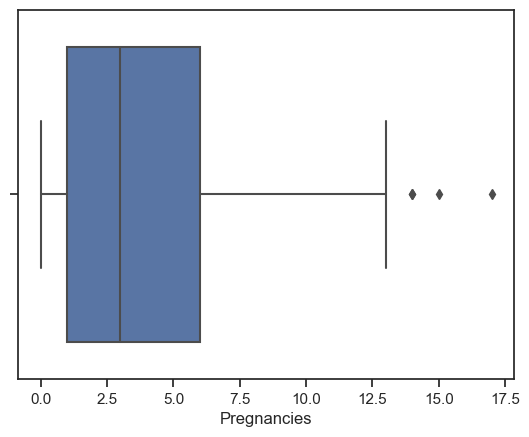

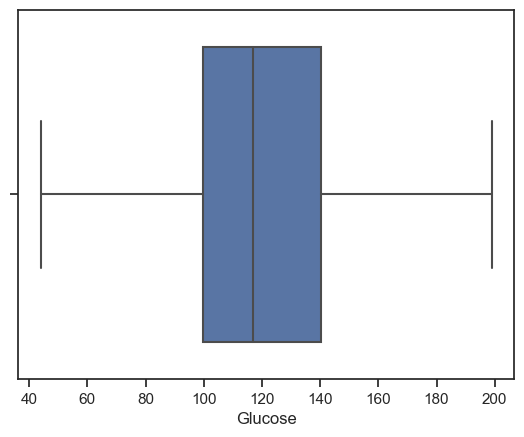

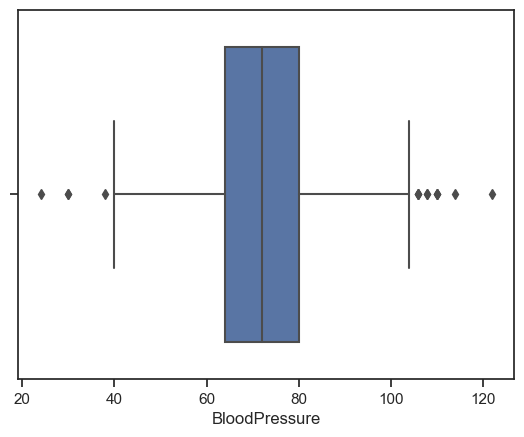

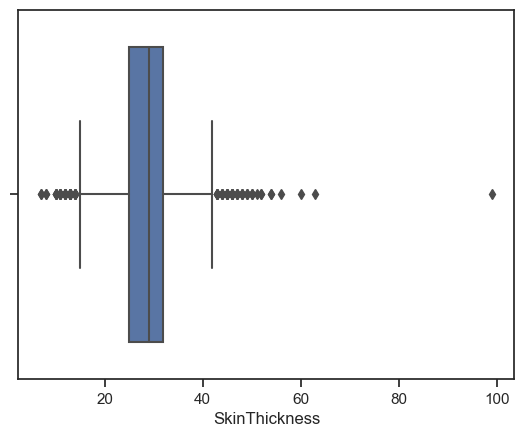

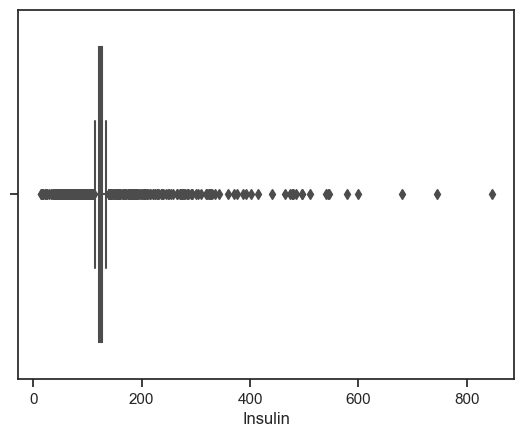

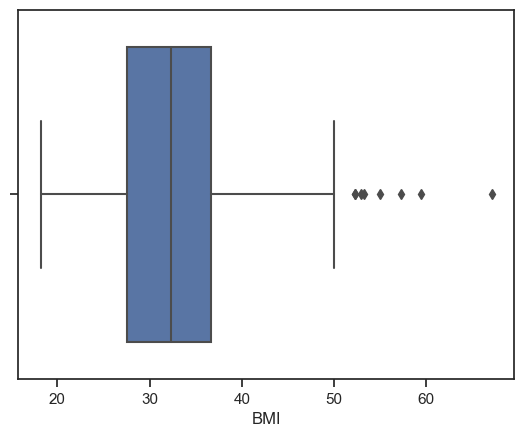

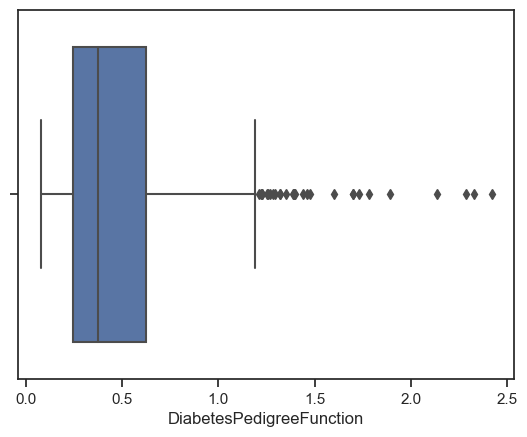

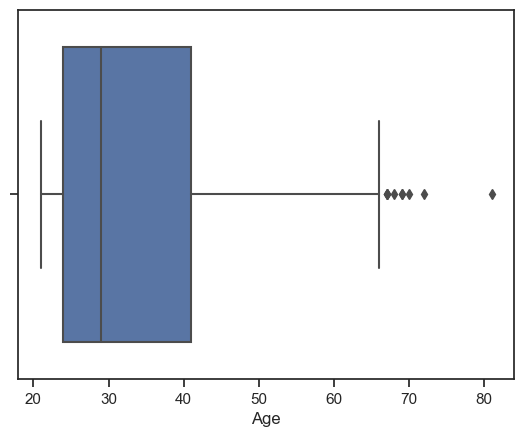

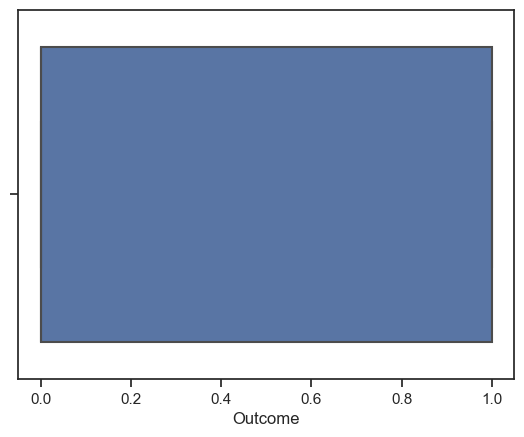

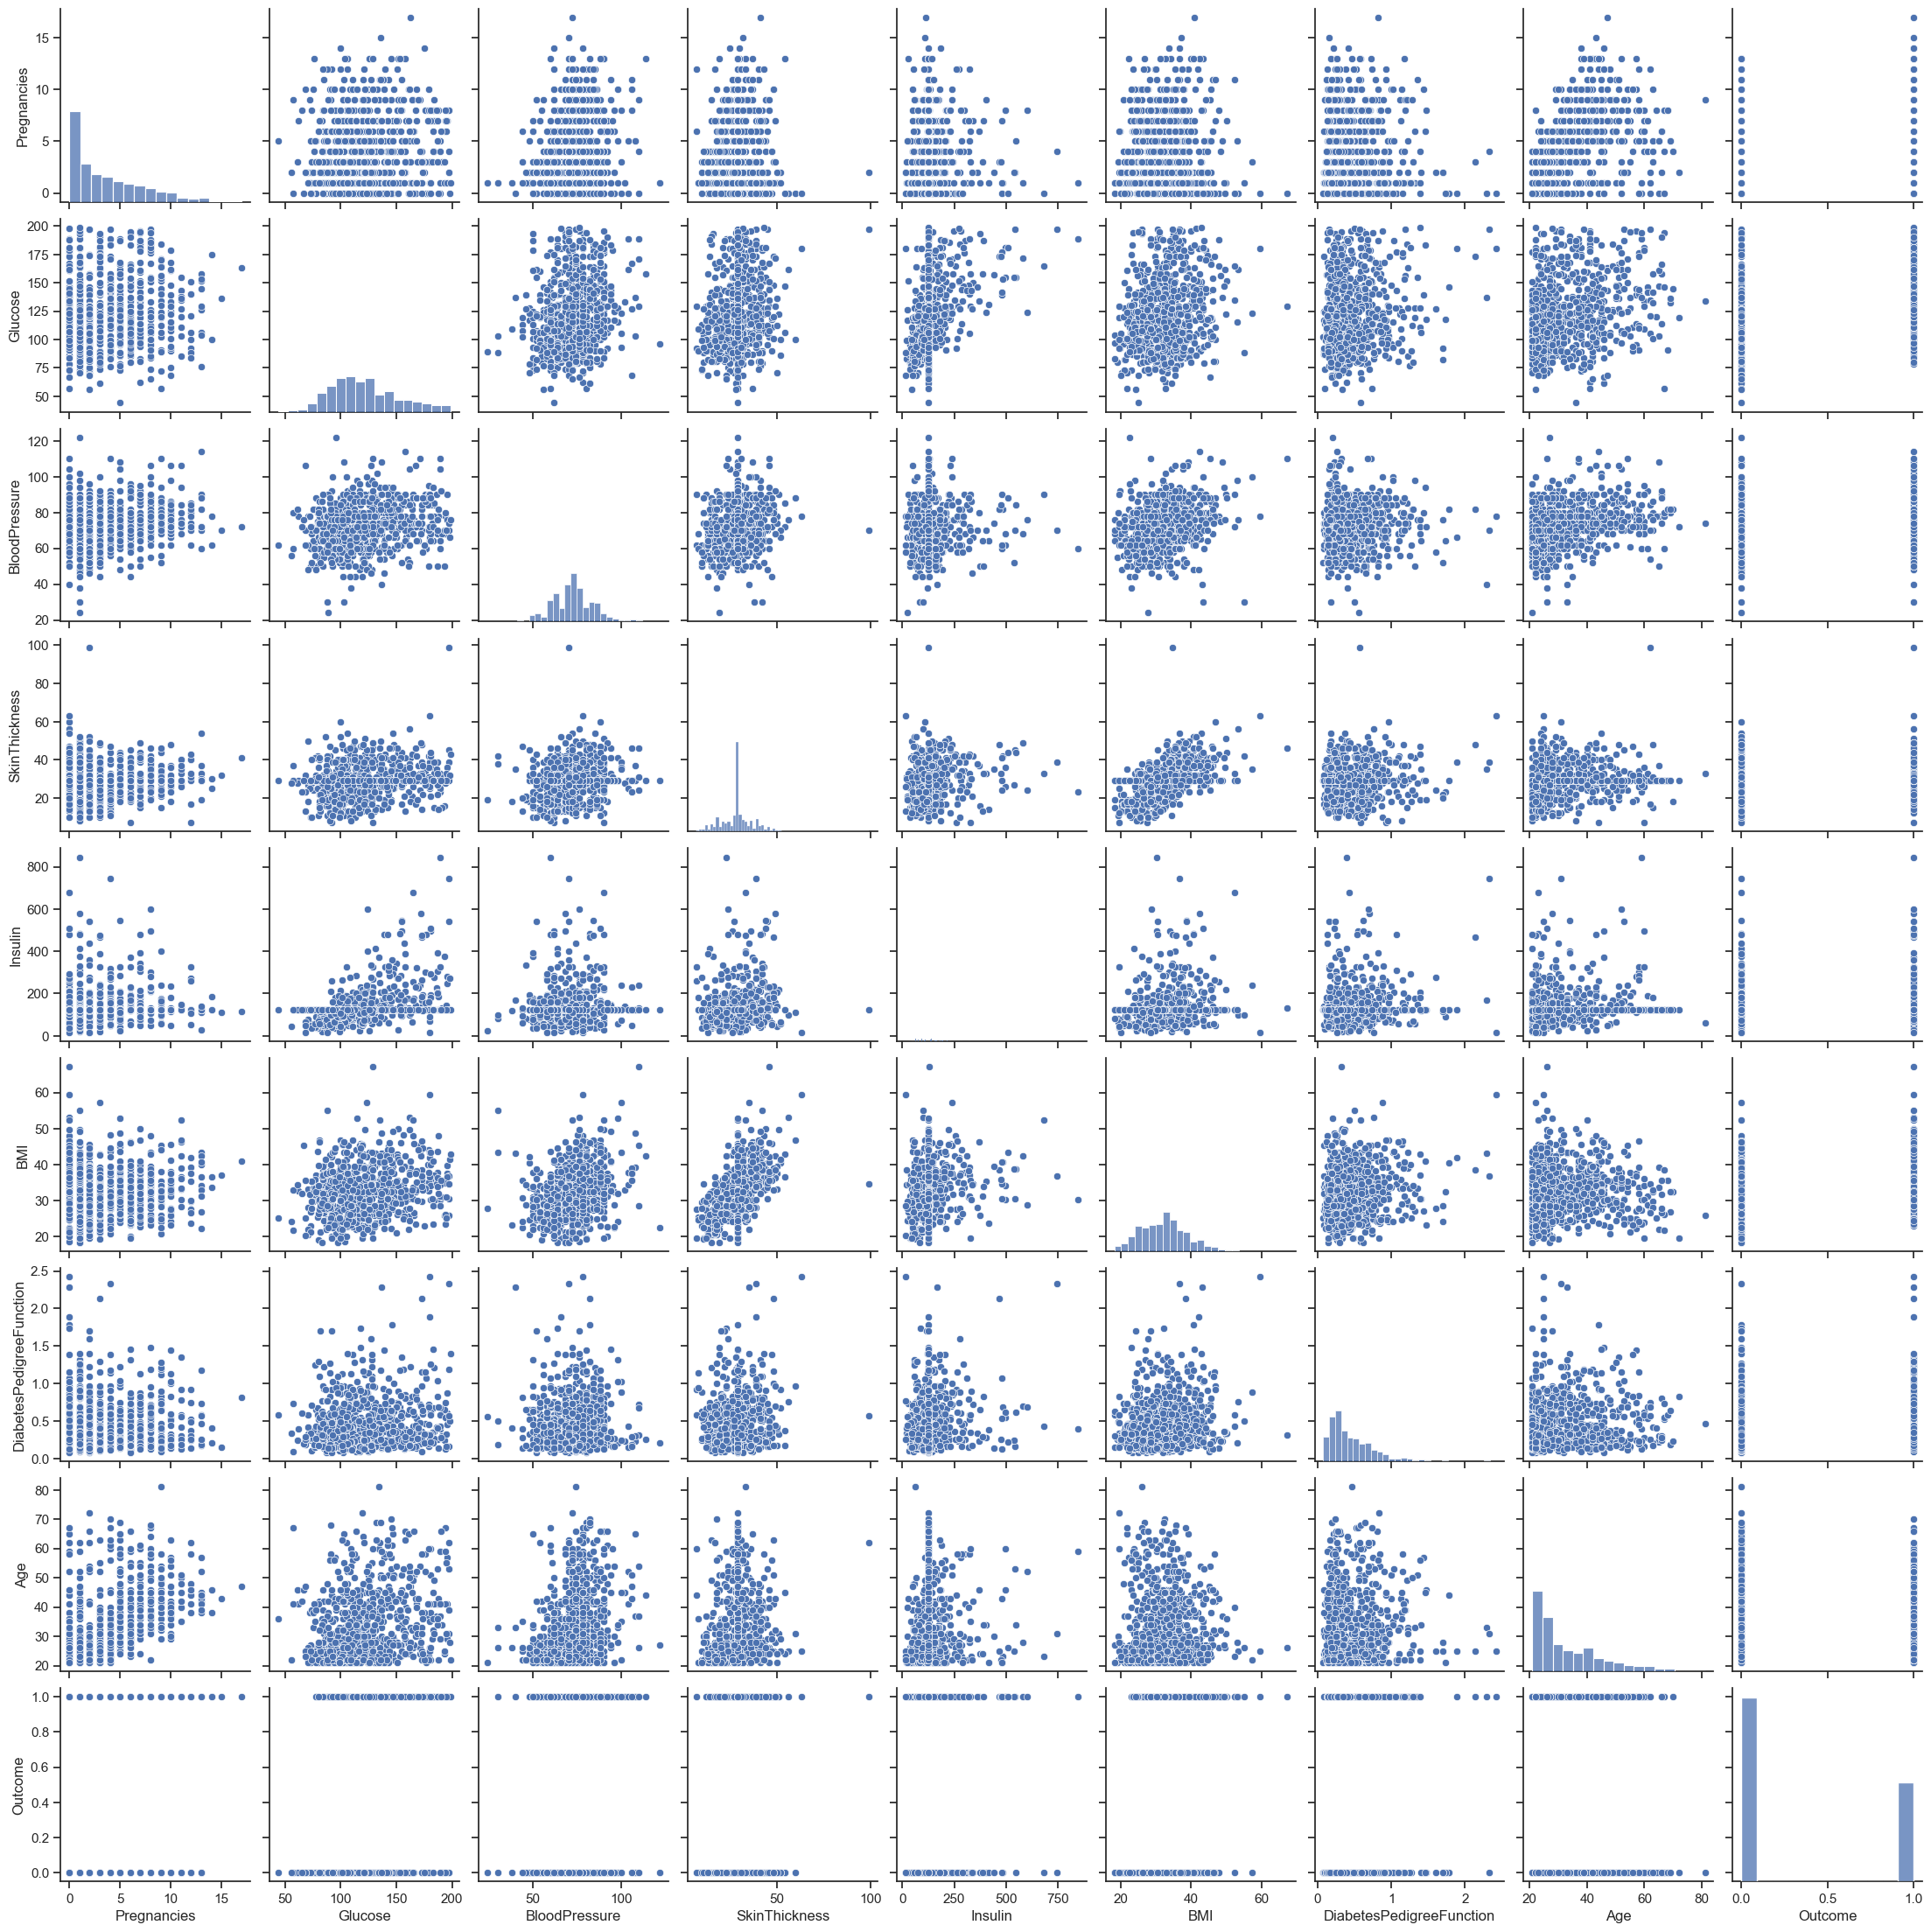

In [20]:
# create box plots for each column
for column in df.columns:
    plt.figure()
    sns.boxplot(x=df[column])

# create scatter plots for each pair of columns
sns.pairplot(df)

In [21]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


These results suggest that there are a few outliers in some of the features, particularly in the BloodPressure, SkinThickness, and Insulin columns, as shown in the box plots. The scatter plots suggest that some features have a weak or moderate correlation with the outcome variable, but no feature seems to have a strong correlation.

Based on these results, it might be worthwhile to apply outlier removal techniques to remove the outliers from the dataset

In [22]:
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

The fit_predict() method of the LocalOutlierFactor class returns a numpy array of the same length as the input data, where the value is +1 for inliers, and -1 for outliers. So, the result of this code would be an array of -1s and 1s, where -1 indicates an outlier and 1 indicates an inlier for each row of the input data.

In [23]:
#This code will output the top 30 negative outlier factor (LOF) scores for the dataset df.
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30445978, -2.92374786, -2.48884101, -2.14212684, -2.10681912,
       -2.01096252, -1.95451646, -1.85897968, -1.85560273, -1.79534906,
       -1.76242167, -1.75335109, -1.70511865, -1.61825357, -1.61335976,
       -1.61146741, -1.59353209, -1.58395622, -1.56001231, -1.54747971,
       -1.54551614, -1.54200867, -1.52416841, -1.51755432, -1.51610354,
       -1.5074031 , -1.50672838, -1.50050127, -1.50037921, -1.49619189])

In [24]:
# This code will calculate the threshold value for the LOF scores. The threshold value is chosen as the negative outlier factor score of the 7th smallest observation in the dataset. This value will be used to classify observations as outliers or inliers.
threshold = np.sort(df_scores)[7]
threshold

-1.8589796753198442

Next code will creates a Boolean array outlier where the value is True if the corresponding element in df_scores is greater than threshold, and False otherwise. 

In [25]:
outlier = df_scores > threshold
df = df[outlier]

In [26]:
# Now check the size of the data
df.shape

(760, 9)

In [27]:
## Feature Engineering


Creating new variables, also known as feature engineering, can be useful in machine learning because it can help to improve the performance of models. For example, in the case of the diabetes dataset, BMI, Insulin, and glucose levels are all important factors in determining whether someone has diabetes. However, the relationship between these variables and the target variable may not be linear. By creating new variables based on these variables, we may be able to capture non-linear relationships that can help to improve the accuracy of the model.

In [28]:
#Categorical variables were assigned based on the different BMI ranges that were determined.

UpdatedBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["UpdatedBMI"] = UpdatedBMI
df.loc[df["BMI"] < 18.5, "UpdatedBMI"] = UpdatedBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "UpdatedBMI"] = UpdatedBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "UpdatedBMI"] = UpdatedBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "UpdatedBMI"] = UpdatedBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "UpdatedBMI"] = UpdatedBMI[4]
df.loc[df["BMI"] > 39.9 ,"UpdatedBMI"] = UpdatedBMI[5]

C:\Users\User\AppData\Local\Temp\ipykernel_15748\2395913850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UpdatedBMI"] = UpdatedBMI


In [29]:
# Create new feature for Updated glucose
UpdatedGlucose = pd.Series(["Low", "Normal", "High", "Severe High"], dtype="category")
df["UpdatedGlucose"] = UpdatedGlucose
df.loc[df["Glucose"] <= 70, "UpdatedGlucose"] = UpdatedGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "UpdatedGlucose"] = UpdatedGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "UpdatedGlucose"] = UpdatedGlucose[2]
df.loc[df["Glucose"] > 126, "UpdatedGlucose"] = UpdatedGlucose[3]

C:\Users\User\AppData\Local\Temp\ipykernel_15748\3582156832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UpdatedGlucose"] = UpdatedGlucose


In [30]:
# Create new feature for Updated insulin
UpdatedInsulin = pd.Series(["Normal", "Abnormal"], dtype="category")
df["UpdatedInsulin"] = UpdatedInsulin
df.loc[(df["Insulin"] >= 16) & (df["Insulin"] <= 166), "UpdatedInsulin"] = UpdatedInsulin[0]
df.loc[df["Insulin"] > 166, "UpdatedInsulin"] = UpdatedInsulin[1]

C:\Users\User\AppData\Local\Temp\ipykernel_15748\4156778446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UpdatedInsulin"] = UpdatedInsulin


In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI,UpdatedGlucose,UpdatedInsulin
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity 1,Severe High,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Severe High,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Severe High,Abnormal


Now we need to convert the categorical variables into the numerical.
For converting categorical variables into numerical variables in the diabetes dataset. This is because one-hot encoding creates a separate binary column for each category in a categorical feature, which allows the algorithm to capture the relationship between the categories and the target variable more accurately. Additionally, one-hot encoding can handle nominal data, which means that the order of the categories is not important

In [32]:
df = pd.get_dummies(df, columns=["UpdatedBMI", "UpdatedInsulin", "UpdatedGlucose"], drop_first=True)


In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI_Obesity 1,UpdatedBMI_Obesity 2,UpdatedBMI_Obesity 3,UpdatedBMI_Overweight,UpdatedBMI_Underweight,UpdatedInsulin_Normal,UpdatedGlucose_Low,UpdatedGlucose_Normal,UpdatedGlucose_Severe High
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,0,0,0,0,1,0,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,0,0,0,0,1,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,1


In [34]:
categorical_df = df[['UpdatedBMI_Obesity 1','UpdatedBMI_Obesity 2', 'UpdatedBMI_Obesity 3', 'UpdatedBMI_Overweight','UpdatedBMI_Underweight',
                     'UpdatedInsulin_Normal','UpdatedGlucose_Low','UpdatedGlucose_Normal', 'UpdatedGlucose_Severe High']]

In [35]:
#Define X and y
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] + list(categorical_df.columns)]
y = df['Outcome']

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,UpdatedBMI_Obesity 1,UpdatedBMI_Obesity 2,UpdatedBMI_Obesity 3,UpdatedBMI_Overweight,UpdatedBMI_Underweight,UpdatedInsulin_Normal,UpdatedGlucose_Low,UpdatedGlucose_Normal,UpdatedGlucose_Severe High
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,0,0,0,1,0,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,0,1,0,1,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,0,0,0,0,0,1,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,1,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,1


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7828947368421053


The accuracy of the model is 0.7828947368421053, which means that the model correctly predicts the outcome for approximately 78% of the samples in the test set.

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predicted values with actual values
for i in range(len(y_pred)):
    print(f"Actual value: {y_test.values[i]} - Predicted value: {y_pred[i]}")

Actual value: 1 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 1 - Predicted value: 1
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 1 - Predicted value: 0
Actual value: 1 - Predicted value: 1
Actual value: 1 - Predicted value: 1
Actual value: 1 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 1 - Predicted value: 0
Actual value: 0 - Predicted value: 1
Actual value: 0 - Predicted value: 1
Actual value: 1 - Predicted value: 1
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 1 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 1 - Predicted value: 0
Actual value: 0 - Predicted value: 0
Actual value: 0 - Predicted value: 0
A